In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


In [19]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

# 2 features



In [26]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


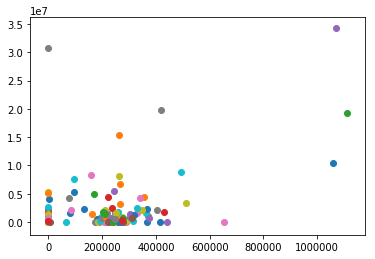

In [27]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()


In [29]:
import pandas as pd
finance_features_df = pd.DataFrame(data=finance_features, columns=[feature_1, feature_2])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
finance_features_df[[feature_1, feature_2]] = scaler.fit_transform(finance_features_df[[feature_1, feature_2]])
finance_features = finance_features_df.to_numpy()

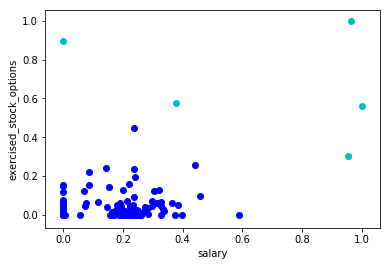

In [30]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
pred = KMeans(n_clusters=2, random_state=0).fit_predict(finance_features)


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters (2 features).pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


# 3 features


In [6]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


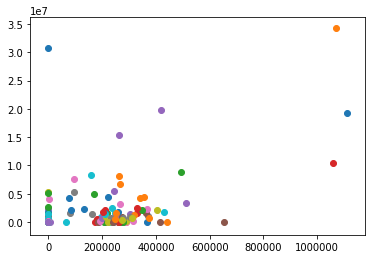

In [7]:
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123700710>,
      dtype=object)

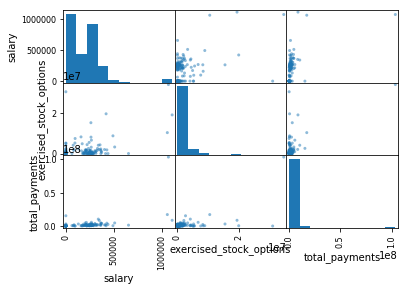

In [10]:
import pandas as pd
from pandas.plotting import scatter_matrix
finance_features_df = pd.DataFrame(data=finance_features, columns=[feature_1, feature_2, feature_3])
scatter_matrix(finance_features_df)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
finance_features_df[[feature_1, feature_2, feature_3]] = scaler.fit_transform(finance_features_df[[feature_1, feature_2, feature_3]])
finance_features = finance_features_df.to_numpy()

array([[3.29165684e-01, 0.00000000e+00, 1.02532746e-02],
       [2.40360024e-01, 1.94493691e-01, 5.44066653e-02],
       [1.53826564e-01, 1.42374791e-01, 2.04447106e-03],
       [0.00000000e+00, 1.89776031e-02, 0.00000000e+00],
       [2.18934757e-01, 1.61230322e-01, 2.78758765e-03],
       [2.40351925e-01, 0.00000000e+00, 6.06917011e-03],
       [0.00000000e+00, 1.43671679e-02, 1.78469553e-02],
       [3.33359130e-01, 3.21428222e-02, 3.95884434e-02],
       [0.00000000e+00, 1.51697646e-01, 3.02420458e-02],
       [1.77358453e-01, 2.56282799e-02, 1.67789926e-02],
       [1.17636049e-01, 6.64592547e-02, 2.99365604e-02],
       [2.59695768e-01, 0.00000000e+00, 1.09160222e-02],
       [2.23661832e-01, 2.22809026e-02, 1.94557650e-02],
       [2.31706768e-01, 0.00000000e+00, 1.49194871e-02],
       [0.00000000e+00, 6.45816409e-02, 9.33298505e-03],
       [0.00000000e+00, 1.08361721e-02, 0.00000000e+00],
       [2.59653474e-01, 0.00000000e+00, 1.43911450e-02],
       [2.26458662e-01, 3.07531

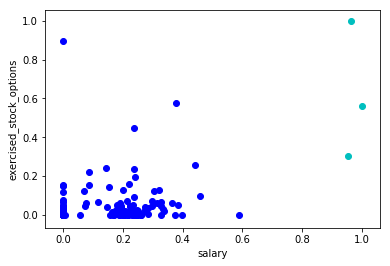

In [12]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
pred = KMeans(n_clusters=2, random_state=0).fit_predict(finance_features)

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters (3 features).pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"



# Find min max


In [35]:
exercised_stock_options = []
for users in data_dict:
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    exercised_stock_options.append(val)
    
print max(exercised_stock_options)
print min(exercised_stock_options)



34348384
3285


In [36]:
salary = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    salary.append(val)
    
print max(salary)
print min(salary)



1111258
477
